In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
df = df.dropna(subset = ['Income'])

In [5]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [7]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [8]:
df1 = df.copy()

In [9]:
objects = ['Education', 'Marital_Status']
for obj in objects:
    print(f'unique objects {df1[obj].unique()}')

unique objects ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
unique objects ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


# Feature Engineering

In [10]:
df1['Education'] = df1['Education'].replace({'Graduation': 'Graduate',
                         'PhD': 'Postgraduate',
                         'Master': 'Postgraduate',
                         'Basic': 'Undergraduate',
                         '2n Cycle': 'Undergraduate'})

df1['Marital_Status'] = df1['Marital_Status'].replace({'Together': 'Partner',
                              'Married': 'Partner',
                              'Divorced': 'Single',
                              'Widow': 'Single',
                              'Alone': 'Single',
                              'Absurd': 'Single',
                              'YOLO': 'Single'})

df1 = df1.rename(columns = {'MntWines': 'Wine',
                      'MntFruits': 'Fruits',
                      'MntMeatProducts': 'Meat',
                      'MntFishProducts': 'Fish',
                      'MntSweetProducts': 'Sweets',
                      'MntGoldProds': 'Gold'})

df1['Nos_Of_Children'] = df1['Kidhome'] + df1['Teenhome']
df1['Loyalty_Duration'] = (pd.to_datetime('01-01-2015', dayfirst=True) - pd.to_datetime(df1['Dt_Customer'], dayfirst=True) - pd.to_timedelta(56, unit='D')).dt.days
df1['Age'] = 2015 - df['Year_Birth']
df1['Total_Spent'] = df1['Wine'] + df1['Fruits'] + df1['Meat'] + df1['Fish'] + df1['Sweets'] + df1['Gold']
df1['Is_parent'] = np.where(df1.Nos_Of_Children > 0, 1, 0)
df1['Family_size'] = df1['Marital_Status'].replace({'Single': 1, 'Partner': 2}).astype(int) + df1['Nos_Of_Children']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20356\569437174.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Family_size'] = df1['Marital_Status'].replace({'Single': 1, 'Partner': 2}).astype(int) + df1['Nos_Of_Children']


In [11]:
df1.head()

ID  Year_Birth     Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957      Graduate         Single  58138.0        0         0   
1  2174        1954      Graduate         Single  46344.0        1         1   
2  4141        1965      Graduate        Partner  71613.0        0         0   
3  6182        1984      Graduate        Partner  26646.0        1         0   
4  5324        1981  Postgraduate        Partner  58293.0        1         0   

  Dt_Customer  Recency  Wine  ...  Complain  Z_CostContact  Z_Revenue  \
0  04-09-2012       58   635  ...         0              3         11   
1  08-03-2014       38    11  ...         0              3         11   
2  21-08-2013       26   426  ...         0              3         11   
3  10-02-2014       26    11  ...         0              3         11   
4  19-01-2014       94   173  ...         0              3         11   

   Response  Nos_Of_Children  Loyalty_Duration  Age  Total_Spent  Is_parent  \
0         1                0               793   58         1617          0   
1         0                2               243   61           27          1   
2         0                0               442   50          776          0   
3         0                1               269   31           53          1   
4         0                1               291   34          422          1   

   Family_size  
0            1  
1            3  
2            2  
3            3  
4            3  

[5 rows x 35 columns]

In [12]:
df2 = df1.copy()
df2 = df2.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Recency', 'Response'], axis = 'columns')

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Wine                 2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

In [14]:
objects = ['Education', 'Marital_Status']
for obj in objects:
    print(f'unique objects {df2[obj].unique()}')

unique objects ['Graduate' 'Postgraduate' 'Undergraduate']
unique objects ['Single' 'Partner']


In [15]:
df2.head()

Education Marital_Status   Income  Kidhome  Teenhome  Wine  Fruits  \
0      Graduate         Single  58138.0        0         0   635      88   
1      Graduate         Single  46344.0        1         1    11       1   
2      Graduate        Partner  71613.0        0         0   426      49   
3      Graduate        Partner  26646.0        1         0    11       4   
4  Postgraduate        Partner  58293.0        1         0   173      43   

   Meat  Fish  Sweets  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0   546   172      88  ...             0             0             0   
1     6     2       1  ...             0             0             0   
2   127   111      21  ...             0             0             0   
3    20    10       3  ...             0             0             0   
4   118    46      27  ...             0             0             0   

   Complain  Nos_Of_Children  Loyalty_Duration  Age  Total_Spent  Is_parent  \
0         0                0               793   58         1617          0   
1         0                2               243   61           27          1   
2         0                0               442   50          776          0   
3         0                1               269   31           53          1   
4         0                1               291   34          422          1   

   Family_size  
0            1  
1            3  
2            2  
3            3  
4            3  

[5 rows x 28 columns]

## Encoding and Scaling

In [16]:
encoders = {}

for col in objects:
    Encoder = LabelEncoder()
    df2[col] = Encoder.fit_transform(df2[col])
    encoders[col] = Encoder

df2.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Wine  Fruits  Meat  \
0          0               1  58138.0        0         0   635      88   546   
1          0               1  46344.0        1         1    11       1     6   
2          0               0  71613.0        0         0   426      49   127   
3          0               0  26646.0        1         0    11       4    20   
4          1               0  58293.0        1         0   173      43   118   

   Fish  Sweets  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0   172      88  ...             0             0             0         0   
1     2       1  ...             0             0             0         0   
2   111      21  ...             0             0             0         0   
3    10       3  ...             0             0             0         0   
4    46      27  ...             0             0             0         0   

   Nos_Of_Children  Loyalty_Duration  Age  Total_Spent  Is_parent  Family_size  
0                0               793   58         1617          0            1  
1                2               243   61           27          1            3  
2                0               442   50          776          0            2  
3                1               269   31           53          1            3  
4                1               291   34          422          1            3  

[5 rows x 28 columns]

In [17]:
scaled_columns = ['Income', 'Wine', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                  'NumStorePurchases', 'NumWebVisitsMonth', 'Nos_Of_Children', 'Loyalty_Duration', 'Age', 'Total_Spent', 'Family_size']

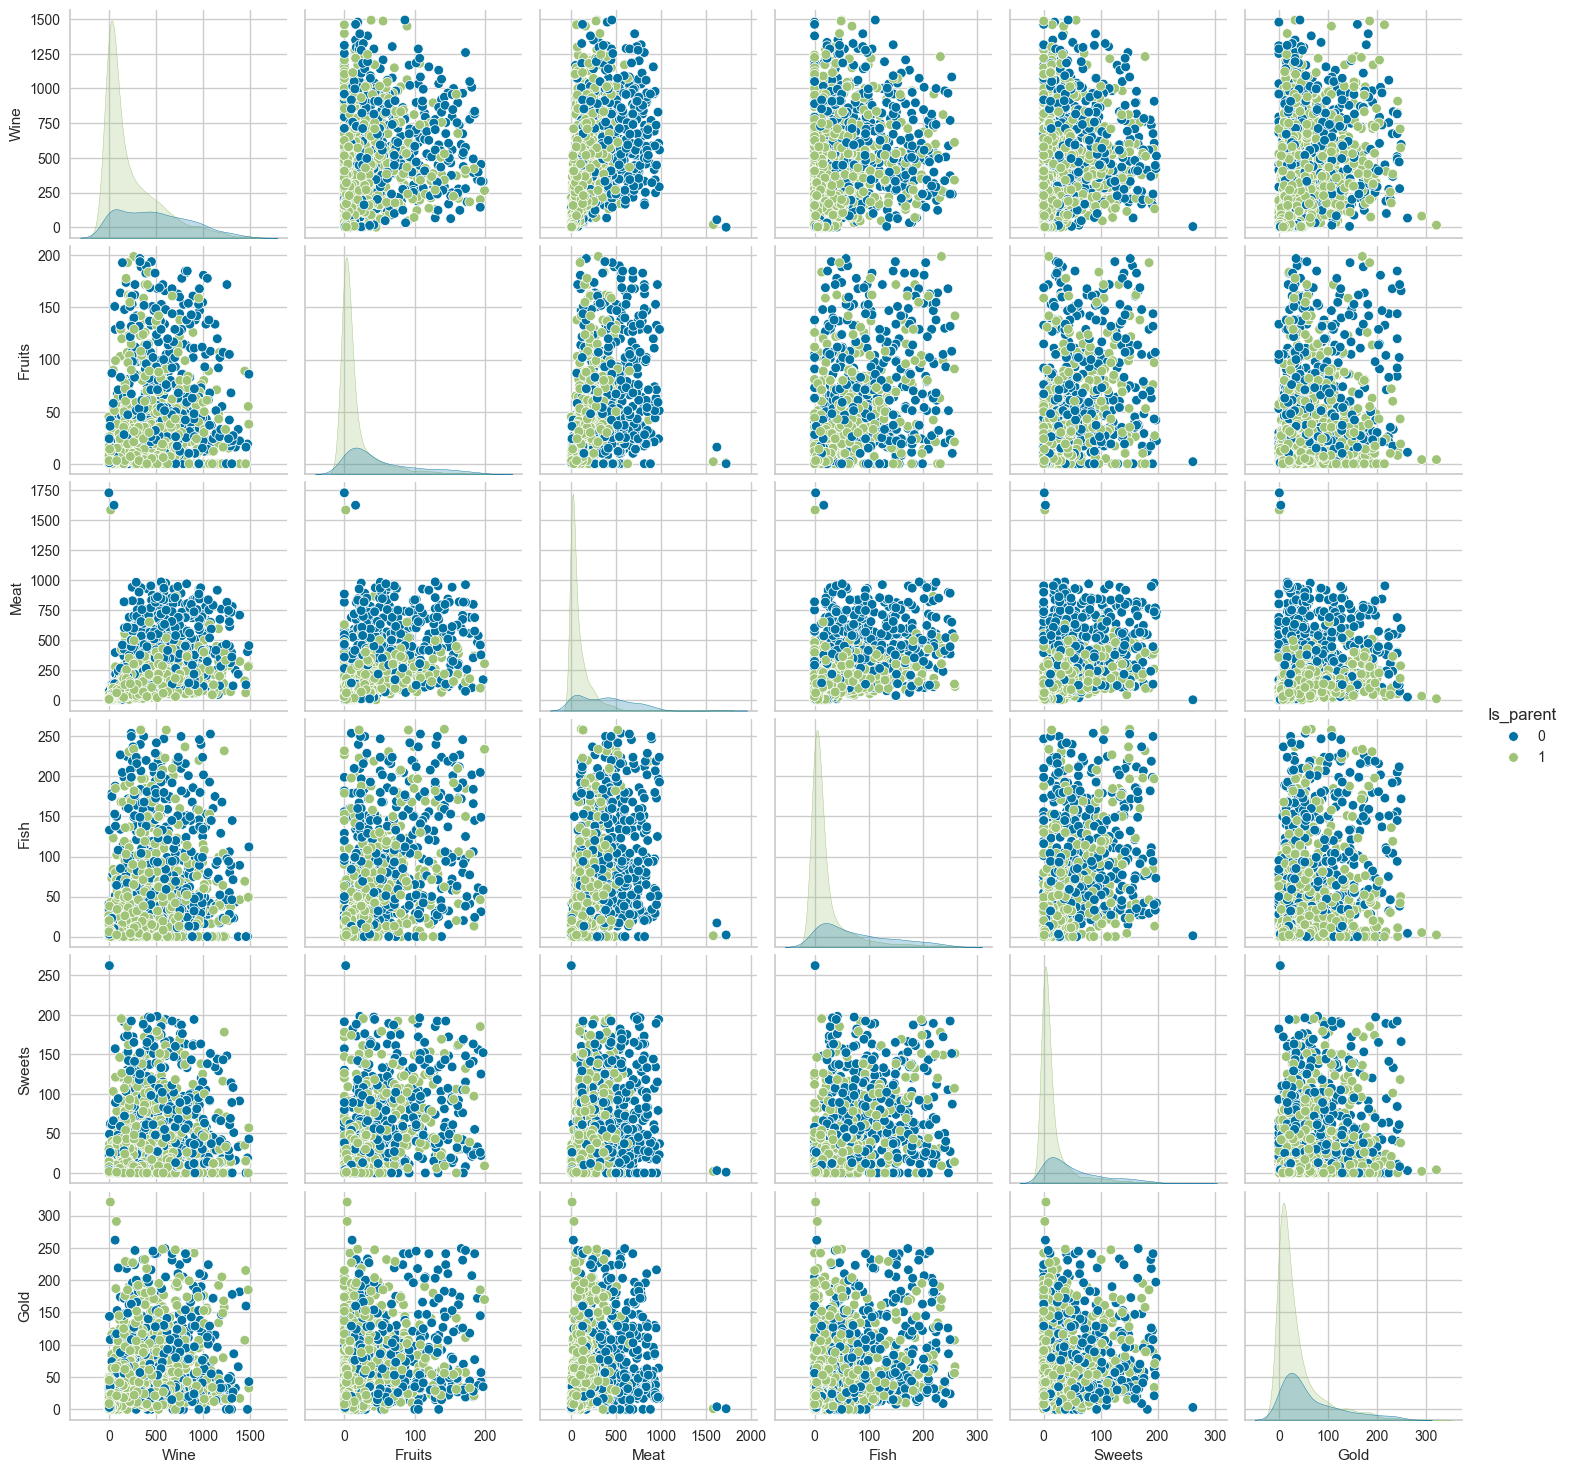

In [18]:
Products = ['Wine', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
sns.pairplot(data = df2, vars = Products, hue = 'Is_parent')

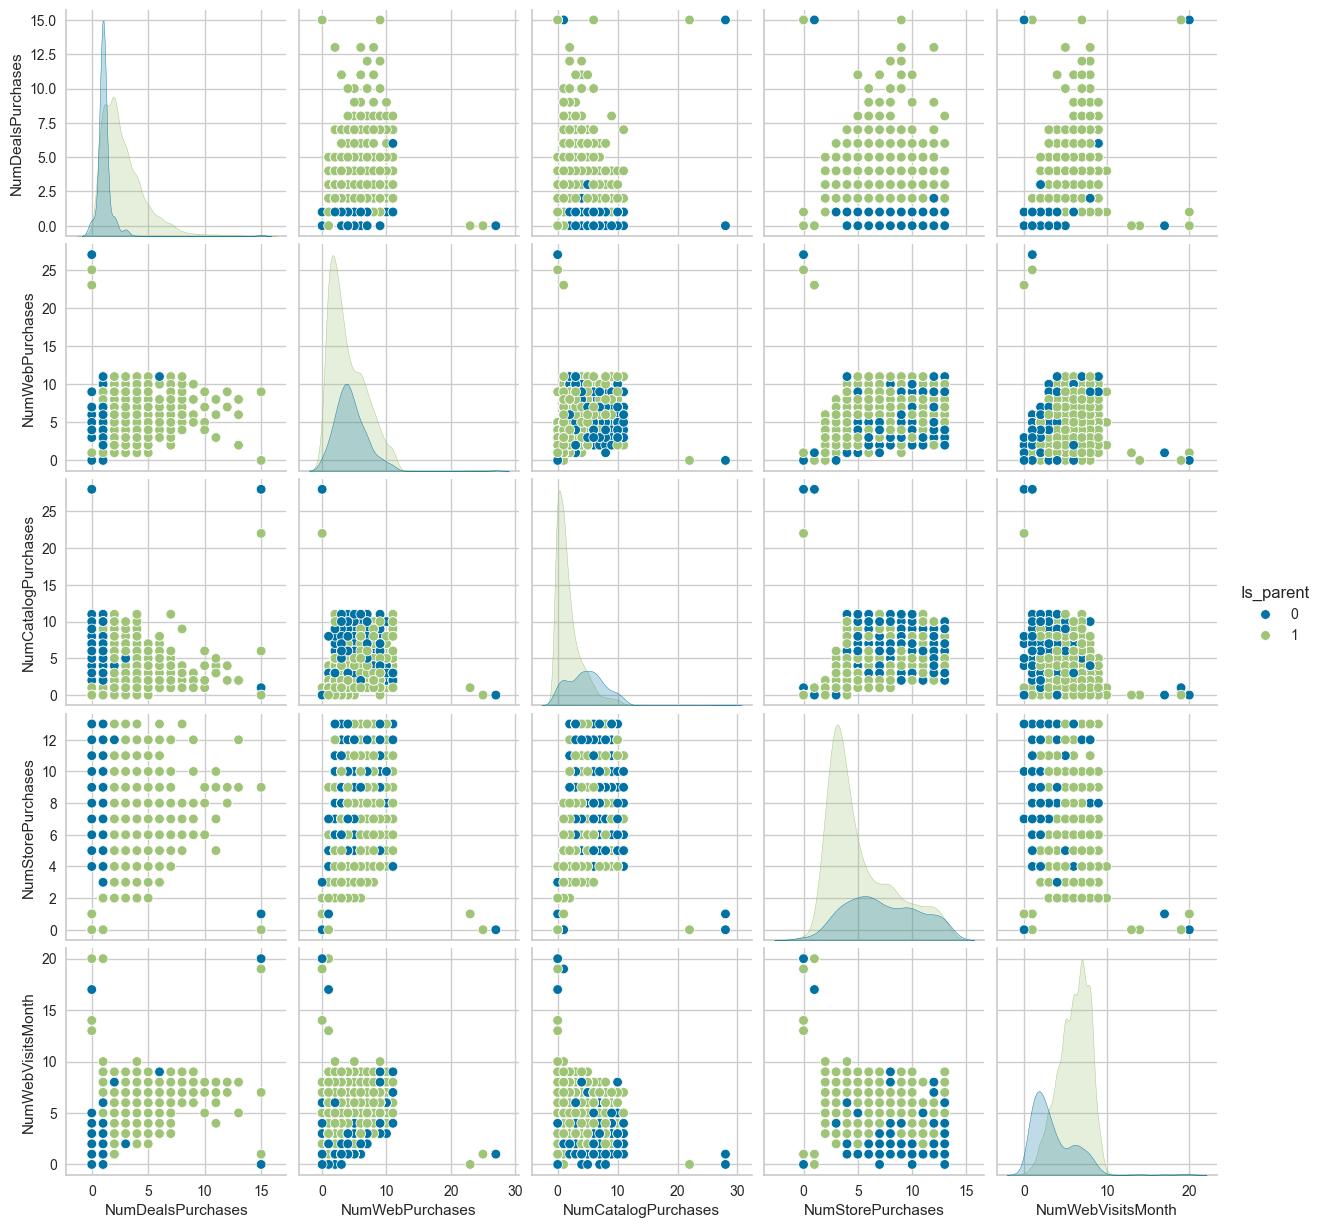

In [19]:
Purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
sns.pairplot(data = df2, vars = Purchases, hue = 'Is_parent')

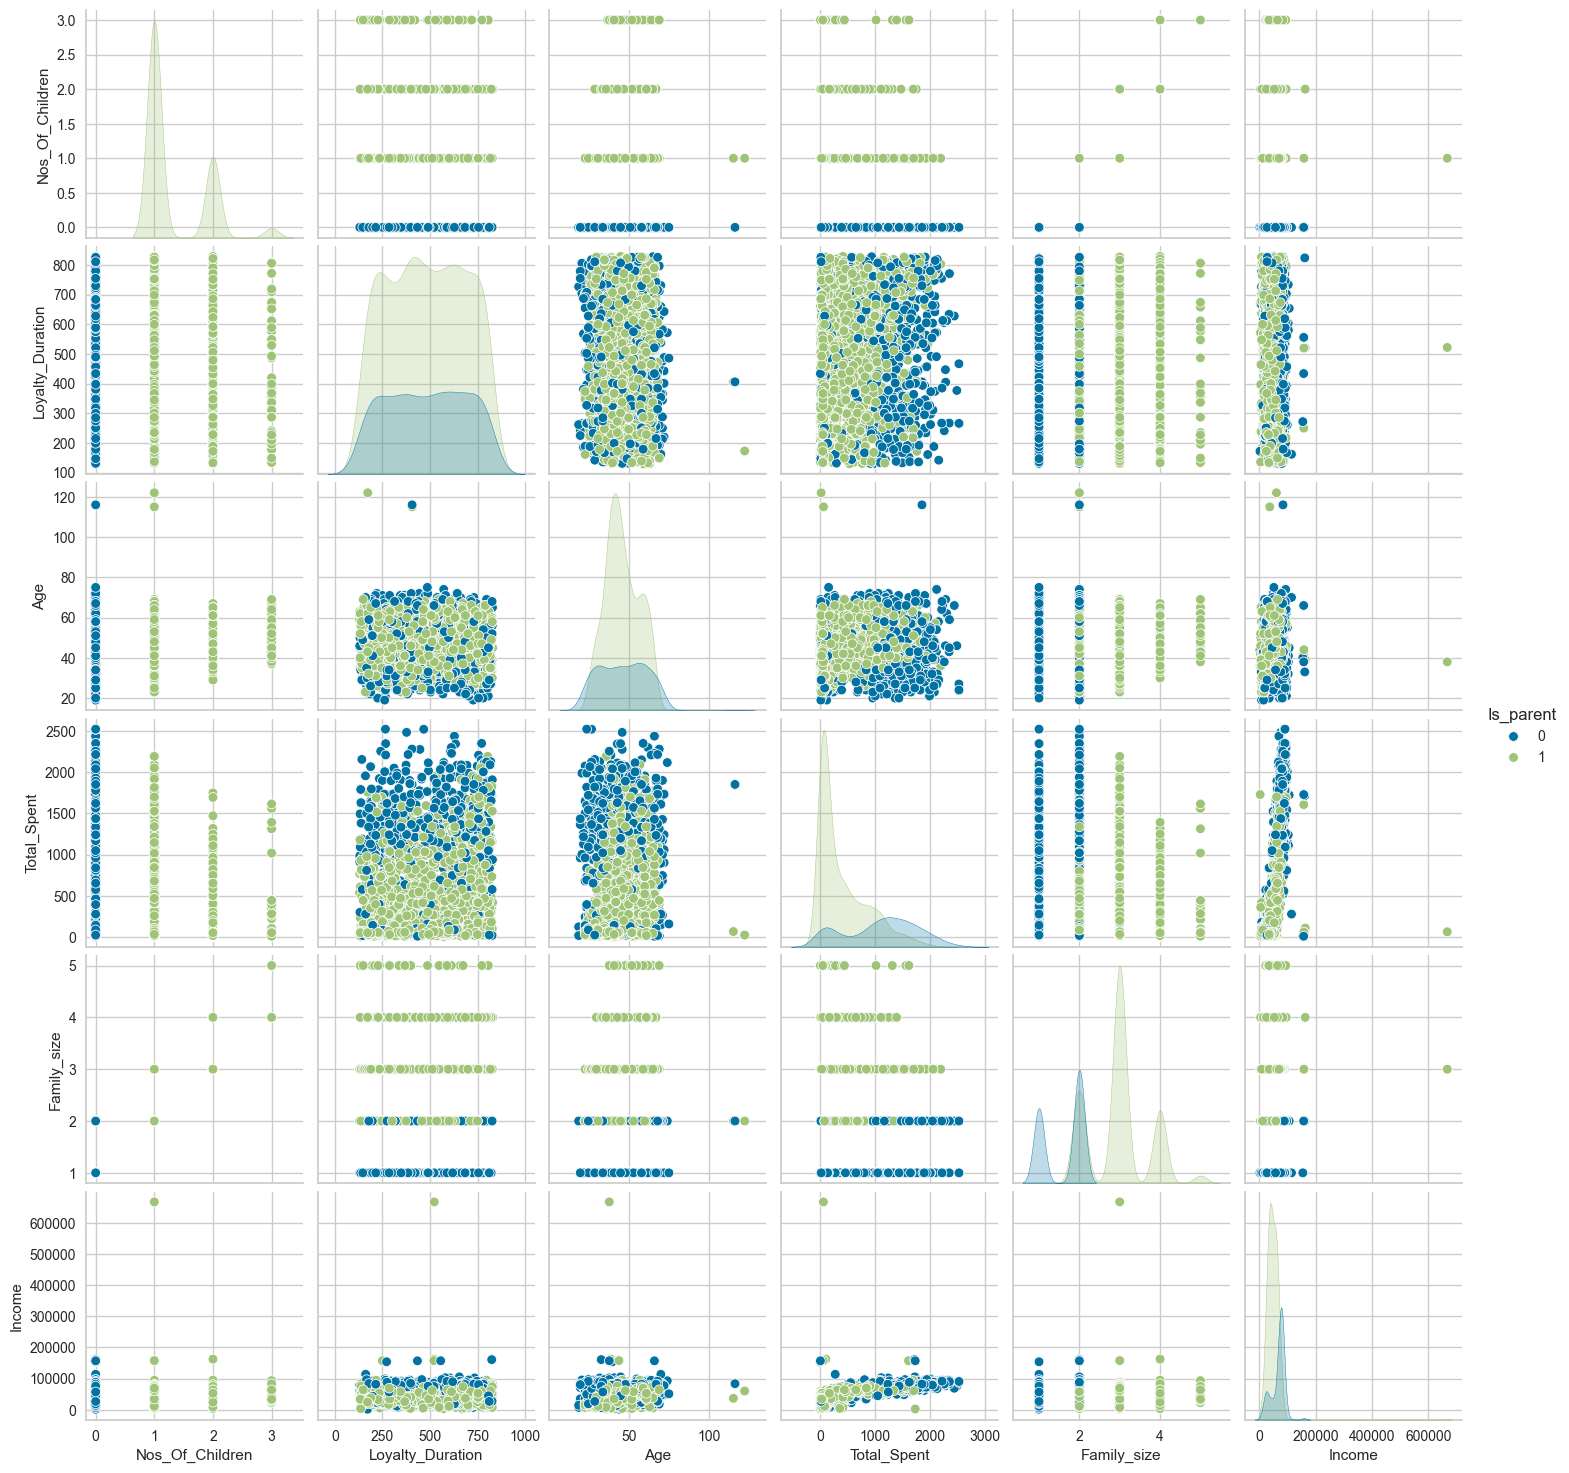

In [20]:
others = ['Nos_Of_Children', 'Loyalty_Duration', 'Age', 'Total_Spent', 'Family_size', 'Income']
sns.pairplot(data = df2, vars = others, hue = 'Is_parent')

In [21]:
scaler = StandardScaler()
df2[scaled_columns] = scaler.fit_transform(df2[scaled_columns])

In [22]:
df2.head()

Education  Marital_Status    Income  Kidhome  Teenhome      Wine    Fruits  \
0          0               1  0.234063        0         0  0.978226  1.549429   
1          0               1 -0.234559        1         1 -0.872024 -0.637328   
2          0               0  0.769478        0         0  0.358511  0.569159   
3          0               0 -1.017239        1         0 -0.872024 -0.561922   
4          1               0  0.240221        1         0 -0.391671  0.418348   

       Meat      Fish    Sweets  ...  AcceptedCmp5  AcceptedCmp1  \
0  1.690227  2.454568  1.484827  ...             0             0   
1 -0.717986 -0.651038 -0.633880  ...             0             0   
2 -0.178368  1.340203 -0.146821  ...             0             0   
3 -0.655551 -0.504892 -0.585174  ...             0             0   
4 -0.218505  0.152766 -0.000703  ...             0             0   

   AcceptedCmp2  Complain  Nos_Of_Children  Loyalty_Duration       Age  \
0             0         0        -1.264803          1.529129  0.986443   
1             0         0         1.405806         -1.188411  1.236801   
2             0         0        -1.264803         -0.205155  0.318822   
3             0         0         0.070501         -1.059945 -1.266777   
4             0         0         0.070501         -0.951244 -1.016420   

   Total_Spent  Is_parent  Family_size  
0     1.675488          0    -1.758673  
1    -0.962358          1     0.450009  
2     0.280250          0    -0.654332  
3    -0.919224          1     0.450009  
4    -0.307044          1     0.450009  

[5 rows x 28 columns]

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Marital_Status       2216 non-null   int64  
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Wine                 2216 non-null   float64
 6   Fruits               2216 non-null   float64
 7   Meat                 2216 non-null   float64
 8   Fish                 2216 non-null   float64
 9   Sweets               2216 non-null   float64
 10  Gold                 2216 non-null   float64
 11  NumDealsPurchases    2216 non-null   float64
 12  NumWebPurchases      2216 non-null   float64
 13  NumCatalogPurchases  2216 non-null   float64
 14  NumStorePurchases    2216 non-null   float64
 15  NumWebVisitsMonth    2216 non-null   float6

In [24]:
df3 = df2[(df2['Income'] >= -3) & (df2['Income'] <= 3)]
df4 = df3[(df3['Age'] >= -3) & (df3['Age'] <= 3)]

In [25]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   int64  
 1   Marital_Status       2205 non-null   int64  
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Wine                 2205 non-null   float64
 6   Fruits               2205 non-null   float64
 7   Meat                 2205 non-null   float64
 8   Fish                 2205 non-null   float64
 9   Sweets               2205 non-null   float64
 10  Gold                 2205 non-null   float64
 11  NumDealsPurchases    2205 non-null   float64
 12  NumWebPurchases      2205 non-null   float64
 13  NumCatalogPurchases  2205 non-null   float64
 14  NumStorePurchases    2205 non-null   float64
 15  NumWebVisitsMonth    2205 non-null   float6

# PCA

In [26]:
pca = PCA(n_components = 3)
principal_components = pca.fit_transform(df4)
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3'])
pca_df.head()

PC1       PC2       PC3
0  4.683183  0.385779  2.067412
1 -2.701337 -0.288612 -1.922341
2  2.151559 -0.494640 -0.045552
3 -2.504595 -1.241369 -0.116554
4 -0.424419  0.308000 -0.255293

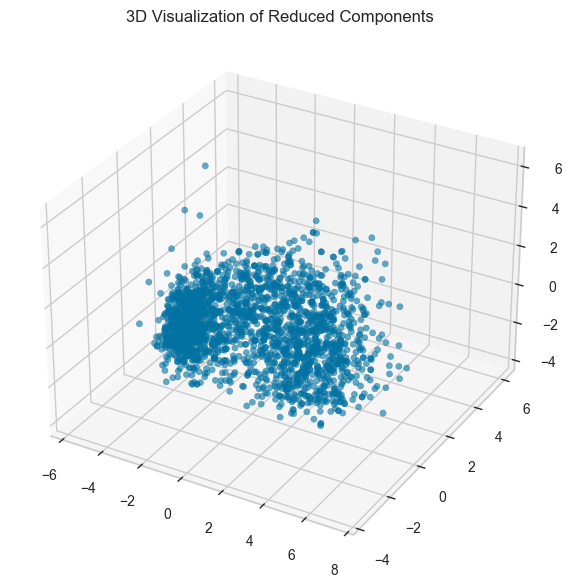

In [27]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],  alpha=0.6)
ax.set_title('3D Visualization of Reduced Components')
plt.show()

# Clustering

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))

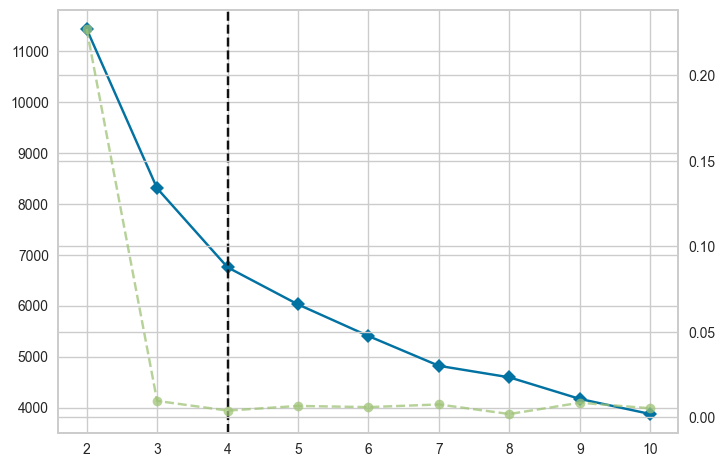

In [28]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df)

In [29]:
# Kmeans
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)


score = silhouette_score(pca_df, cluster_labels)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.34


In [30]:
agg = AgglomerativeClustering(n_clusters=4)
cluster_labels_agg = agg.fit_predict(pca_df)

score = silhouette_score(pca_df, cluster_labels_agg)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.31


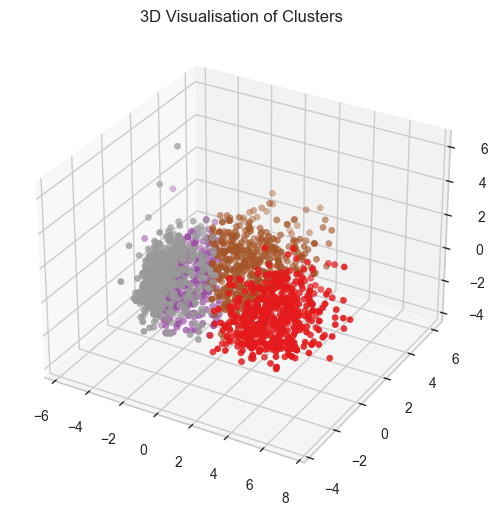

In [31]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c = cluster_labels, cmap ='Set1' )
ax.set_title('3D Visualisation of Clusters')
plt.show()

# EDA

In [32]:
df5 = df4.copy()

In [33]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   int64  
 1   Marital_Status       2205 non-null   int64  
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Wine                 2205 non-null   float64
 6   Fruits               2205 non-null   float64
 7   Meat                 2205 non-null   float64
 8   Fish                 2205 non-null   float64
 9   Sweets               2205 non-null   float64
 10  Gold                 2205 non-null   float64
 11  NumDealsPurchases    2205 non-null   float64
 12  NumWebPurchases      2205 non-null   float64
 13  NumCatalogPurchases  2205 non-null   float64
 14  NumStorePurchases    2205 non-null   float64
 15  NumWebVisitsMonth    2205 non-null   float6

In [34]:
df5[scaled_columns] = scaler.inverse_transform(df5[scaled_columns])
df5.head()

Education  Marital_Status   Income  Kidhome  Teenhome   Wine  Fruits  \
0          0               1  58138.0        0         0  635.0    88.0   
1          0               1  46344.0        1         1   11.0     1.0   
2          0               0  71613.0        0         0  426.0    49.0   
3          0               0  26646.0        1         0   11.0     4.0   
4          1               0  58293.0        1         0  173.0    43.0   

    Meat   Fish  Sweets  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0  546.0  172.0    88.0  ...             0             0             0   
1    6.0    2.0     1.0  ...             0             0             0   
2  127.0  111.0    21.0  ...             0             0             0   
3   20.0   10.0     3.0  ...             0             0             0   
4  118.0   46.0    27.0  ...             0             0             0   

   Complain  Nos_Of_Children  Loyalty_Duration   Age  Total_Spent  Is_parent  \
0         0     1.110223e-16             793.0  58.0       1617.0          0   
1         0     2.000000e+00             243.0  61.0         27.0          1   
2         0     1.110223e-16             442.0  50.0        776.0          0   
3         0     1.000000e+00             269.0  31.0         53.0          1   
4         0     1.000000e+00             291.0  34.0        422.0          1   

   Family_size  
0          1.0  
1          3.0  
2          2.0  
3          3.0  
4          3.0  

[5 rows x 28 columns]

In [35]:
for col in objects:
    df5[col] = encoders[col].inverse_transform(df5[col])

In [36]:
df5.head()

Education Marital_Status   Income  Kidhome  Teenhome   Wine  Fruits  \
0      Graduate         Single  58138.0        0         0  635.0    88.0   
1      Graduate         Single  46344.0        1         1   11.0     1.0   
2      Graduate        Partner  71613.0        0         0  426.0    49.0   
3      Graduate        Partner  26646.0        1         0   11.0     4.0   
4  Postgraduate        Partner  58293.0        1         0  173.0    43.0   

    Meat   Fish  Sweets  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0  546.0  172.0    88.0  ...             0             0             0   
1    6.0    2.0     1.0  ...             0             0             0   
2  127.0  111.0    21.0  ...             0             0             0   
3   20.0   10.0     3.0  ...             0             0             0   
4  118.0   46.0    27.0  ...             0             0             0   

   Complain  Nos_Of_Children  Loyalty_Duration   Age  Total_Spent  Is_parent  \
0         0     1.110223e-16             793.0  58.0       1617.0          0   
1         0     2.000000e+00             243.0  61.0         27.0          1   
2         0     1.110223e-16             442.0  50.0        776.0          0   
3         0     1.000000e+00             269.0  31.0         53.0          1   
4         0     1.000000e+00             291.0  34.0        422.0          1   

   Family_size  
0          1.0  
1          3.0  
2          2.0  
3          3.0  
4          3.0  

[5 rows x 28 columns]

In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Wine                 2205 non-null   float64
 6   Fruits               2205 non-null   float64
 7   Meat                 2205 non-null   float64
 8   Fish                 2205 non-null   float64
 9   Sweets               2205 non-null   float64
 10  Gold                 2205 non-null   float64
 11  NumDealsPurchases    2205 non-null   float64
 12  NumWebPurchases      2205 non-null   float64
 13  NumCatalogPurchases  2205 non-null   float64
 14  NumStorePurchases    2205 non-null   float64
 15  NumWebVisitsMonth    2205 non-null   float6

In [38]:
df5 = df5.reset_index(drop= True)
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Wine                 2205 non-null   float64
 6   Fruits               2205 non-null   float64
 7   Meat                 2205 non-null   float64
 8   Fish                 2205 non-null   float64
 9   Sweets               2205 non-null   float64
 10  Gold                 2205 non-null   float64
 11  NumDealsPurchases    2205 non-null   float64
 12  NumWebPurchases      2205 non-null   float64
 13  NumCatalogPurchases  2205 non-null   float64
 14  NumStorePurchases    2205 non-null   float64
 15  NumWebVisitsMonth    2205 non-null   f

In [39]:
df6 = pd.concat([df5, pca_df], axis = 'columns')
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Wine                 2205 non-null   float64
 6   Fruits               2205 non-null   float64
 7   Meat                 2205 non-null   float64
 8   Fish                 2205 non-null   float64
 9   Sweets               2205 non-null   float64
 10  Gold                 2205 non-null   float64
 11  NumDealsPurchases    2205 non-null   float64
 12  NumWebPurchases      2205 non-null   float64
 13  NumCatalogPurchases  2205 non-null   float64
 14  NumStorePurchases    2205 non-null   float64
 15  NumWebVisitsMonth    2205 non-null   f

In [40]:
df6['clusters'] = cluster_labels
df6.head()

Education Marital_Status   Income  Kidhome  Teenhome   Wine  Fruits  \
0      Graduate         Single  58138.0        0         0  635.0    88.0   
1      Graduate         Single  46344.0        1         1   11.0     1.0   
2      Graduate        Partner  71613.0        0         0  426.0    49.0   
3      Graduate        Partner  26646.0        1         0   11.0     4.0   
4  Postgraduate        Partner  58293.0        1         0  173.0    43.0   

    Meat   Fish  Sweets  ...  Nos_Of_Children  Loyalty_Duration   Age  \
0  546.0  172.0    88.0  ...     1.110223e-16             793.0  58.0   
1    6.0    2.0     1.0  ...     2.000000e+00             243.0  61.0   
2  127.0  111.0    21.0  ...     1.110223e-16             442.0  50.0   
3   20.0   10.0     3.0  ...     1.000000e+00             269.0  31.0   
4  118.0   46.0    27.0  ...     1.000000e+00             291.0  34.0   

   Total_Spent  Is_parent  Family_size       PC1       PC2       PC3  clusters  
0       1617.0          0          1.0  4.683183  0.385779  2.067412         0  
1         27.0          1          3.0 -2.701337 -0.288612 -1.922341         1  
2        776.0          0          2.0  2.151559 -0.494640 -0.045552         0  
3         53.0          1          3.0 -2.504595 -1.241369 -0.116554         3  
4        422.0          1          3.0 -0.424419  0.308000 -0.255293         2  

[5 rows x 32 columns]

## Analysis

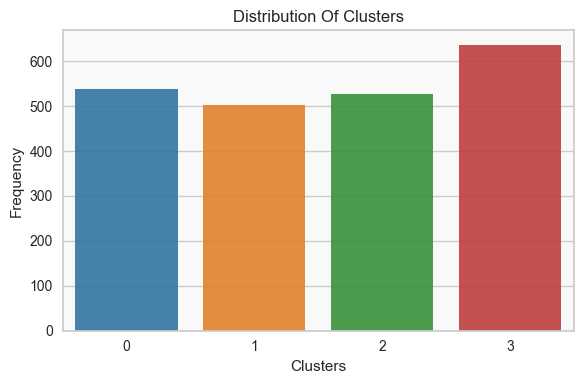

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'clusters',data = df6, hue = 'clusters', palette = 'tab10', legend =False, alpha = 0.9 )
plt.title('Distribution Of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Frequency')
plt.gca().set_facecolor('#f9f9f9')
plt.tight_layout()
plt.show()

# The customers are distributed fairly evenly across the four clusters, with Cluster 3 having the highest number 637 customers and Cluster 1 the 
# lowest 503 customers.

### Parental Status
Key Insights:
1) Cluster 1 and Cluster 2 are almost entirely parents, suggesting campaigns targeting families may perform well here.

2) Cluster 0 is mostly non-parents, with a small parent presence.

3) Cluster 3 is mixed, but still skewed toward parents — potentially ideal for hybrid campaigns.

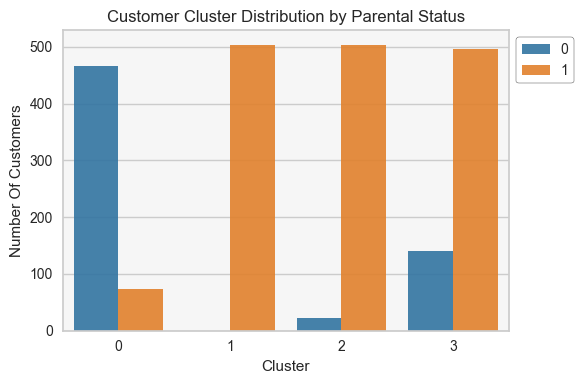

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'clusters',data = df6, hue = 'Is_parent', palette = 'tab10', legend =True, alpha = 0.9 )
plt.title('Customer Cluster Distribution by Parental Status')
plt.xlabel('Cluster')
plt.ylabel('Number Of Customers')
plt.legend(bbox_to_anchor = (1.001,1), frameon = True, edgecolor = 'Black')
plt.gca().set_facecolor('#f6f6f6')
plt.tight_layout()
plt.show()

In [44]:
df6.groupby(['clusters','Is_parent']).size()

clusters  Is_parent
0         0            466
          1             73
1         1            503
2         0             22
          1            504
3         0            140
          1            497
dtype: int64

### Income

Median Income Insights by Cluster
1) ##### Cluster 0: (Median Income: 76,467)
This group represents the highest earning segment. Likely includes customers with high spending potential.Ideal for premium product targeting or loyalty programs.

2) ##### Cluster 2: (Median Income: 60,569.5)
This group earns moderately high income, possibly representing upwardly mobile or mid-tier customers.Suitable for value-based or bundled offers.

3) ##### Cluster 1: (Median Income: 44,124)
This cluster earns below average but not the lowest.Consider targeting them with affordable, budget-friendly options or discounted services.

4) ##### Cluster 3: (Median Income: 30,467)
This group has the lowest median income, suggesting price sensitivity.Best approached with basic plans, heavy discounts, or entry-level products.

In [45]:
df6.groupby('clusters')['Income'].describe().round(2)

count      mean       std      min       25%      50%       75%  \
clusters                                                                    
0         539.0  76031.28  10095.61  32632.0  70038.00  76467.0  82340.00   
1         503.0  43244.81  11833.00   4023.0  35825.50  44124.0  51027.00   
2         526.0  59786.35  11590.38   2447.0  53431.75  60569.5  66827.75   
3         637.0  30841.60  11448.39   1730.0  22775.00  30467.0  38197.00   

               max  
clusters            
0         113734.0  
1          71322.0  
2          94871.0  
3          73395.0

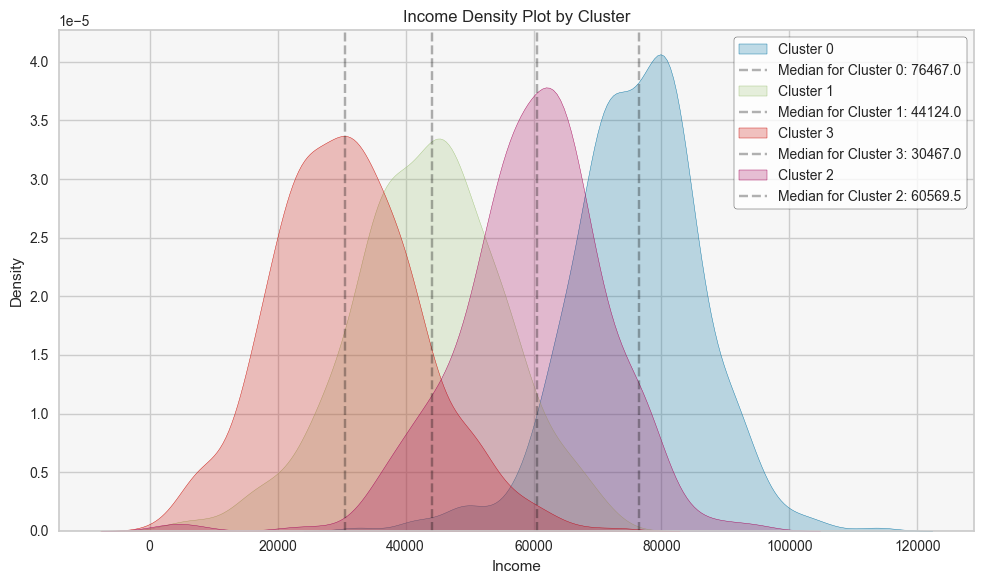

In [46]:
plt.figure(figsize=(10, 6))
for cluster in df6['clusters'].unique():
    income_val = df6[df6['clusters'] == cluster]['Income']
    sns.kdeplot(df6[df6['clusters'] == cluster]['Income'], label=f'Cluster {cluster}', fill=True)
    median_val = income_val.median()
    plt.axvline(x=median_val, color='black', linestyle='--', alpha=0.3, label=f'Median for Cluster {cluster}: {median_val}')

plt.title('Income Density Plot by Cluster')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend(frameon = True, edgecolor = 'Black')
plt.gca().set_facecolor('#f6f6f6')
plt.tight_layout()
plt.show()

### Age

Cluster 3 has the lowest median age, suggesting it contains primarily younger individuals, possibly early-career or younger parents.

Clusters 1 and 2 are more age-stable, likely targeting middle-aged segments.

Cluster 0 shows the widest age range, possibly representing a more diverse demographic segment.

In [47]:
df6.groupby('clusters')['Age'].describe().round(2)

count   mean    std   min   25%   50%   75%   max
clusters                                                   
0         539.0  46.70  13.59  20.0  36.0  46.0  58.0  74.0
1         503.0  50.77   8.97  30.0  43.0  50.0  59.0  69.0
2         526.0  49.50   9.94  23.0  42.0  49.0  58.0  71.0
3         637.0  39.08   9.86  19.0  32.0  38.0  44.0  75.0

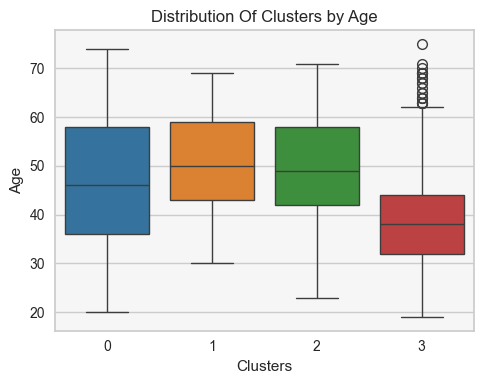

In [48]:
plt.figure(figsize =(5, 4))
sns.boxplot(data = df6, x = 'clusters', y ='Age', hue = 'clusters', legend = False, palette = 'tab10', saturation = .7 )
plt.xlabel('Clusters')
plt.title('Distribution Of Clusters by Age')
plt.gca().set_facecolor('#f6f6f6')
plt.tight_layout()
plt.show()

### Spending

Cluster 0: Your core high-value customers — likely loyal and responsive to premium offers.

Cluster 2: Mid-tier customers — potential to grow their value with strategic offers.

Cluster 1 and 3: Low-spending clusters — may need different engagement tactics (e.g., discounts, bundles, or re-engagement).

In [49]:
df6.groupby('clusters')['Total_Spent'].describe().round(1)

count    mean    std    min     25%     50%     75%     max
clusters                                                             
0         539.0  1383.3  423.5  277.0  1063.0  1364.0  1667.5  2525.0
1         503.0   153.2  136.3    8.0    45.0    92.0   253.5   902.0
2         526.0   854.0  348.3  322.0   575.2   796.0  1070.2  2053.0
3         637.0   103.9  102.6    5.0    37.0    65.0   129.0   577.0

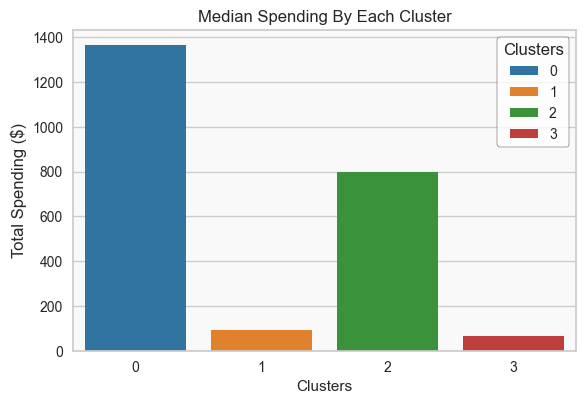

In [50]:
plt.figure(figsize=(6,4))
sns.barplot(data = df6, x = 'clusters', y = 'Total_Spent', estimator = np.median, palette = 'tab10', 
            hue = 'clusters', errorbar = None)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        x_pos = bar.get_x() + bar.get_width() / 2
        plt.text(x_pos, height, f"{height:.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.ylabel('Total Spending ($)', fontsize=12)
plt.xlabel('Clusters')
plt.title('Median Spending By Each Cluster')
plt.legend(title = 'Clusters', frameon = True, edgecolor = 'Black')
plt.gca().set_facecolor('#f9f9f9')
plt.show()

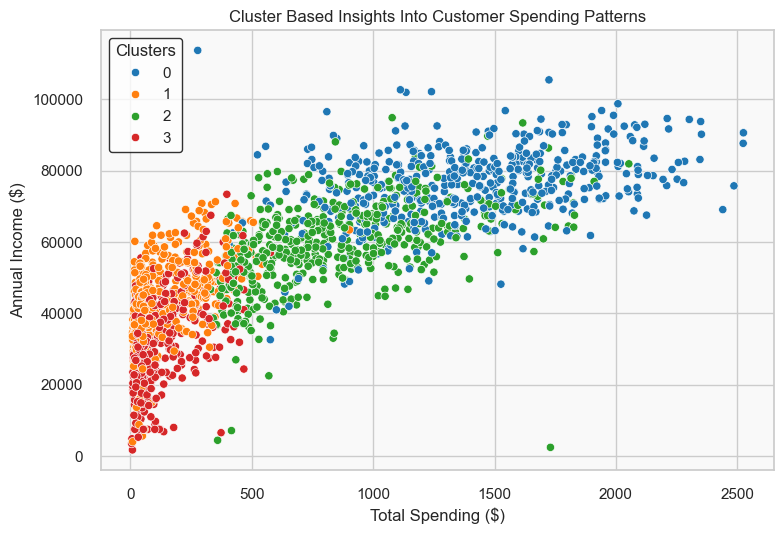

In [51]:
sns.set(style="whitegrid")
sns.scatterplot(x = 'Total_Spent', y ='Income', hue = 'clusters', data = df6, palette = 'tab10')
plt.legend(title = 'Clusters', frameon = True, edgecolor = 'Black')
plt.title('Cluster Based Insights Into Customer Spending Patterns')
plt.xlabel('Total Spending ($)', fontsize=12)
plt.ylabel('Annual Income ($)', fontsize=12)
plt.gca().set_facecolor('#f9f9f9')
plt.tight_layout()

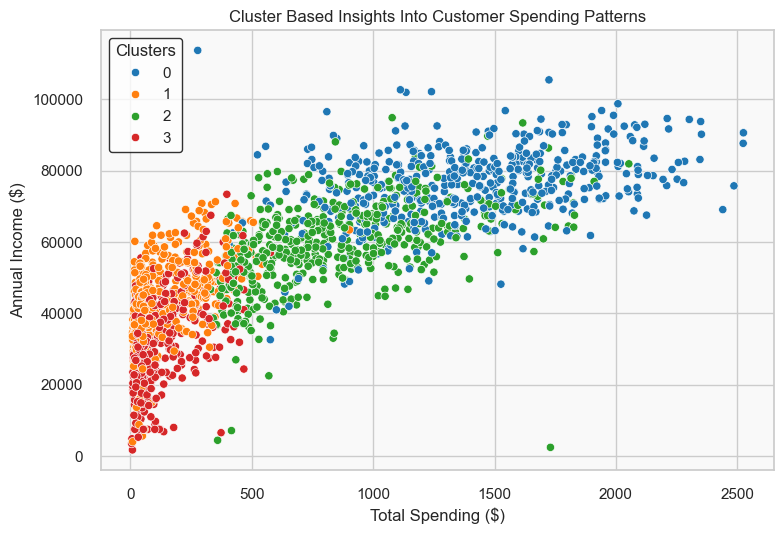

In [125]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

sns.set(style="whitegrid")
sns.scatterplot(x = 'Total_Spent', y ='Income', hue = 'clusters', data = df6, palette = colors)
plt.legend(title = 'Clusters', frameon = True, edgecolor = 'Black')
plt.title('Cluster Based Insights Into Customer Spending Patterns')
plt.xlabel('Total Spending ($)', fontsize=12)
plt.ylabel('Annual Income ($)', fontsize=12)
plt.gca().set_facecolor('#f9f9f9')
plt.tight_layout()

### Family Size

Cluster 1 represents customers with the largest households, possibly indicating families or group households.

Clusters 0 and 3 have the smallest median household sizes, likely individuals or small families.

Cluster 2 sits in the middle, suggesting moderate household sizes.

In [52]:
df6.groupby('clusters')['Family_size'].median()

clusters
0    2.0
1    4.0
2    3.0
3    2.0
Name: Family_size, dtype: float64

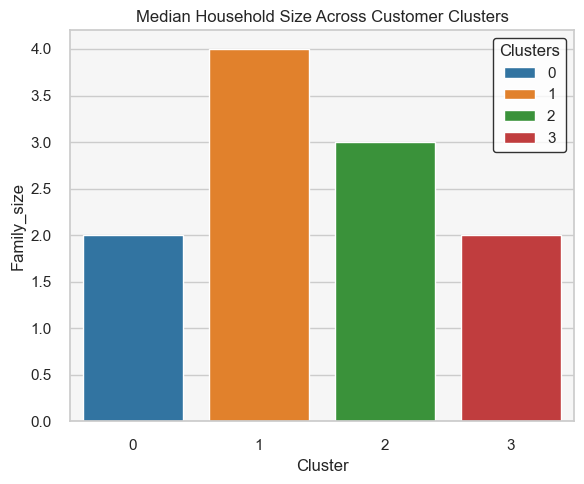

In [53]:
plt.figure(figsize = (6, 5))
sns.barplot(x='clusters', y='Family_size', data=df6, palette='tab10',estimator = 'median', hue = 'clusters', errorbar=None)
plt.legend(title = 'Clusters', edgecolor ='black', frameon =True)
plt.gca().set_facecolor('#f6f6f6')
plt.xlabel('Cluster')
plt.title('Median Household Size Across Customer Clusters')
plt.tight_layout()
plt.show()

### Number of Children
Cluster 1 has the highest median number of children (2) — likely representing larger families.

Clusters 2 and 3 have moderate family sizes with a median of 1 child.

Cluster 0 shows no children, suggesting single individuals or child-free households.

In [54]:
df6.groupby('clusters')['Nos_Of_Children'].median()

clusters
0    1.110223e-16
1    2.000000e+00
2    1.000000e+00
3    1.000000e+00
Name: Nos_Of_Children, dtype: float64

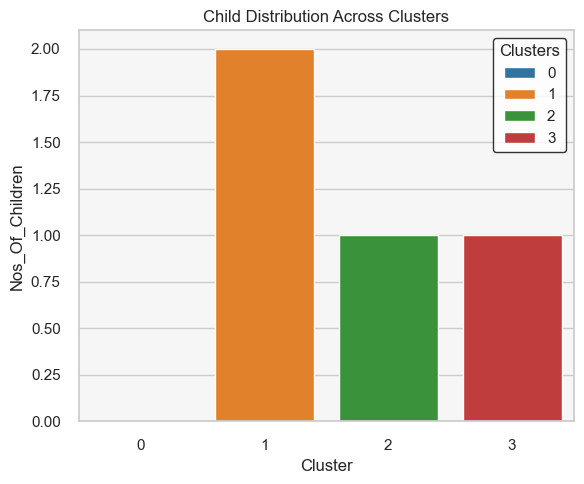

In [55]:
plt.figure(figsize = (6, 5))
sns.barplot(x='clusters', y='Nos_Of_Children', data=df6, palette='tab10',estimator = 'median', hue = 'clusters', errorbar=None)
plt.legend(title = 'Clusters', edgecolor ='black', frameon =True)
plt.gca().set_facecolor('#f6f6f6')
plt.xlabel('Cluster')
plt.title('Child Distribution Across Clusters')
plt.tight_layout()
plt.show()

### Loyalty Duration

Cluster 2 has the most loyal customers overall. People in this group tend to stay with the company for a longer time than those in other clusters.

Cluster 1 has the least loyal customers. On average, they have been with the company for a shorter time compared to the rest.

Clusters 0 and 3 are in the middle. Their customers show moderate loyalty — not as new as Cluster 1, but not as long-term as Cluster 2.

While all clusters include both short-term and long-term customers, Cluster 2 stands out for having more consistent and longer customer relationships.

Clusters 0 whilst not our most loyal customers spent the most this is followed by cluster 2 our most loyal customers

Clusters  1 and 3 spent the least

In [56]:
df6.groupby('clusters')['Loyalty_Duration'].describe().round(1)

count   mean    std    min    25%    50%    75%    max
clusters                                                        
0         539.0  477.5  205.5  131.0  298.5  485.0  656.5  828.0
1         503.0  410.9  193.7  130.0  233.5  390.0  558.0  823.0
2         526.0  569.3  183.4  130.0  439.0  602.0  723.0  829.0
3         637.0  475.8  196.9  132.0  313.0  469.0  646.0  827.0

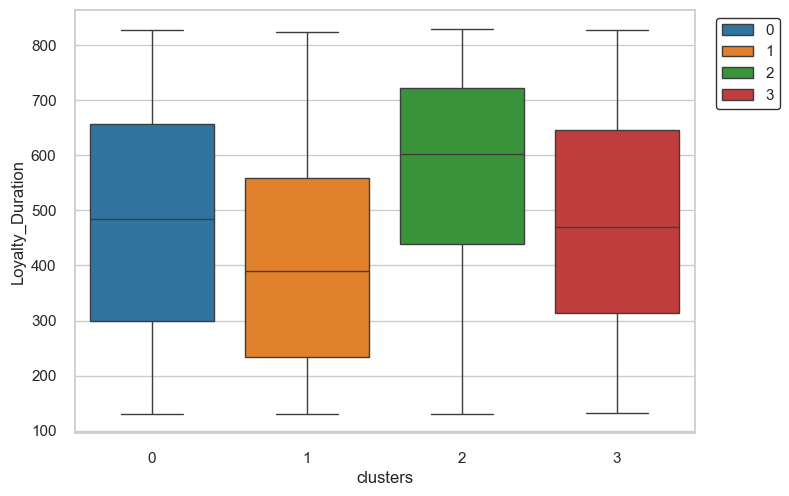

In [57]:
sns.boxplot(x ='clusters', y = 'Loyalty_Duration', data = df6, palette = 'tab10', hue ='clusters')
plt.legend(bbox_to_anchor=(1.15,1), edgecolor = 'black', frameon=True)

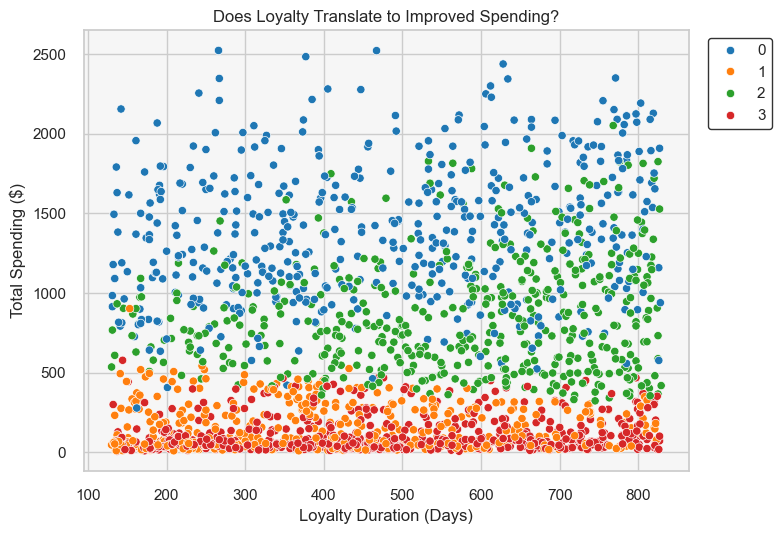

In [58]:
sns.scatterplot(x = 'Loyalty_Duration', y = 'Total_Spent', hue ='clusters', data = df6, palette ='tab10')
plt.title('Does Loyalty Translate to Improved Spending?')
plt.ylabel('Total Spending ($)', fontsize=12)
plt.xlabel('Loyalty Duration (Days)', fontsize=12)
plt.legend(bbox_to_anchor=(1.15,1), edgecolor = 'black', frameon=True)
plt.gca().set_facecolor('#f6f6f6')
plt.tight_layout()
plt.show()

### Marital_Status

All clusters are majority made up of customers in relationships (Partner).

Cluster 1 has the highest proportion of partnered customers (73%), suggesting this group may consist of more settled or family-oriented individuals.

Cluster 0 has the highest percentage of single customers (41%), indicating more individual or possibly younger customers in that segment.

In Clusters 0, 1, and 2, partnered customers spend more than singles — sometimes by a significant margin (e.g., in Cluster 1 and 2).

Cluster 0 shows the highest spending overall for both singles and partners, suggesting this group contains high-value customers.

Interestingly, in Cluster 3, single customers spend slightly more than those in a relationship — a reversal of the trend seen in other clusters.

In [59]:
pd.crosstab(df6['clusters'], df6['Marital_Status'], normalize = 'index').round(2)

Marital_Status  Partner  Single
clusters                       
0                  0.59    0.41
1                  0.73    0.27
2                  0.66    0.34
3                  0.61    0.39

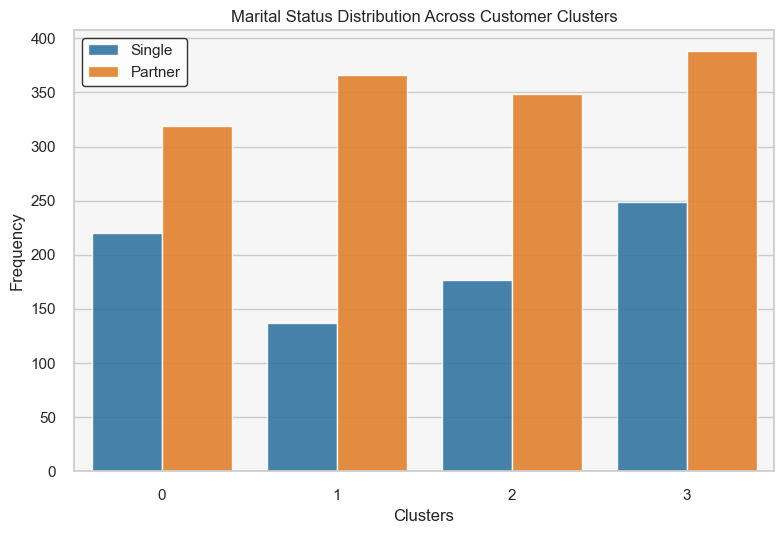

In [60]:
sns.countplot(x ='clusters', data =df6, hue = 'Marital_Status', palette = 'tab10', legend =True, alpha = 0.9)
plt.legend(frameon =True, edgecolor = 'black')
plt.gca().set_facecolor('#f6f6f6')
plt.xlabel('Clusters')
plt.ylabel('Frequency')
plt.title('Marital Status Distribution Across Customer Clusters')
plt.tight_layout()
plt.show()

In [61]:
heatmap_data = df6.pivot_table(
    index='Marital_Status',
    columns='clusters',
    values='Total_Spent',
    aggfunc='median' 
)

In [62]:
heatmap_data

clusters             0      1      2     3
Marital_Status                            
Partner         1378.0  100.5  819.0  62.5
Single          1323.0   73.0  761.0  70.0

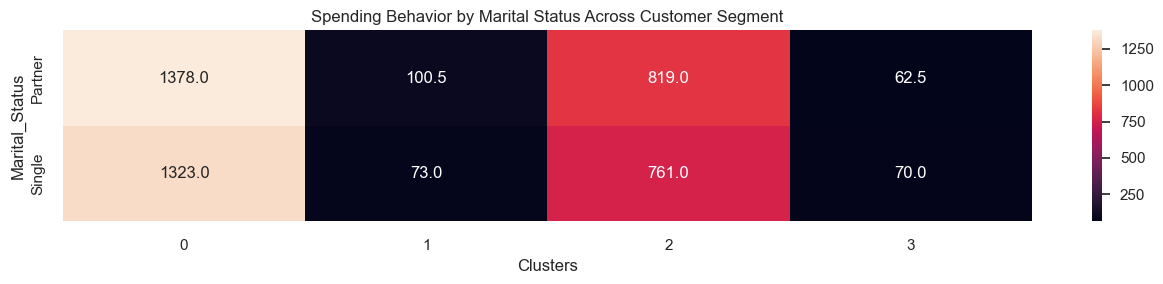

In [63]:
plt.figure(figsize = (13,3))
sns.heatmap(heatmap_data, annot=True, fmt='.1f')
plt.xlabel('Clusters')
plt.title('Spending Behavior by Marital Status Across Customer Segment')
plt.tight_layout()
plt.show()

### Education
Clusters 0, 1, and 2 mostly have people who’ve already finished university.

Cluster 3 is the most mixed group, with more students who are still in school.

People with higher education (graduates and postgraduates) tend to spend more overall, especially in Cluster 0.

Cluster 0 has the biggest spenders, while Cluster 3 has the lowest spenders across all education levels.

In [64]:
pd.crosstab(df6['clusters'], df6['Education'], normalize = 'index').round(2)

Education  Graduate  Postgraduate  Undergraduate
clusters                                        
0              0.55          0.35           0.10
1              0.45          0.47           0.08
2              0.51          0.42           0.06
3              0.50          0.30           0.20

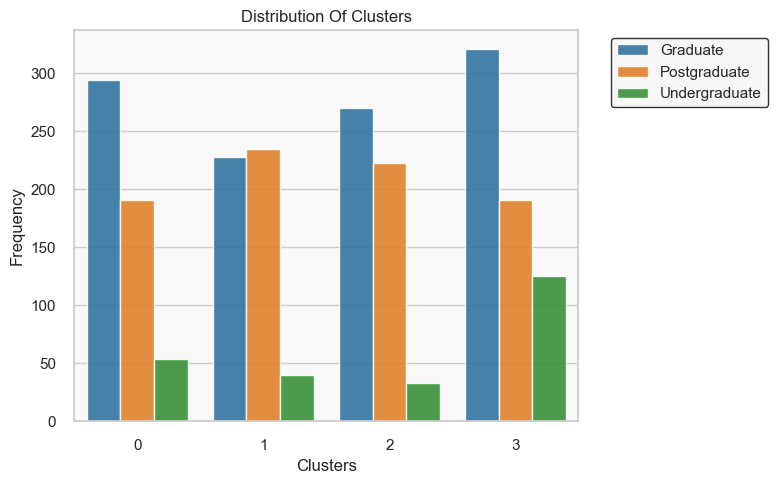

In [65]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'clusters',data = df6, hue = 'Education', palette = 'tab10', alpha = 0.9 )
plt.title('Distribution Of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Frequency')
plt.gca().set_facecolor('#f9f9f9')
plt.legend(frameon = True, bbox_to_anchor = (1.05,1), edgecolor = 'black', facecolor ='#f6f6f6')
plt.tight_layout()
plt.show()

In [66]:
heatmap_data = df6.pivot_table(
    index='Education',
    columns='clusters',
    values='Total_Spent',
    aggfunc='median' 
)

In [67]:
heatmap_data

clusters            0      1      2     3
Education                                
Graduate       1366.0   94.0  757.5  65.0
Postgraduate   1483.0  103.0  860.0  71.0
Undergraduate  1155.5   63.5  694.0  58.0

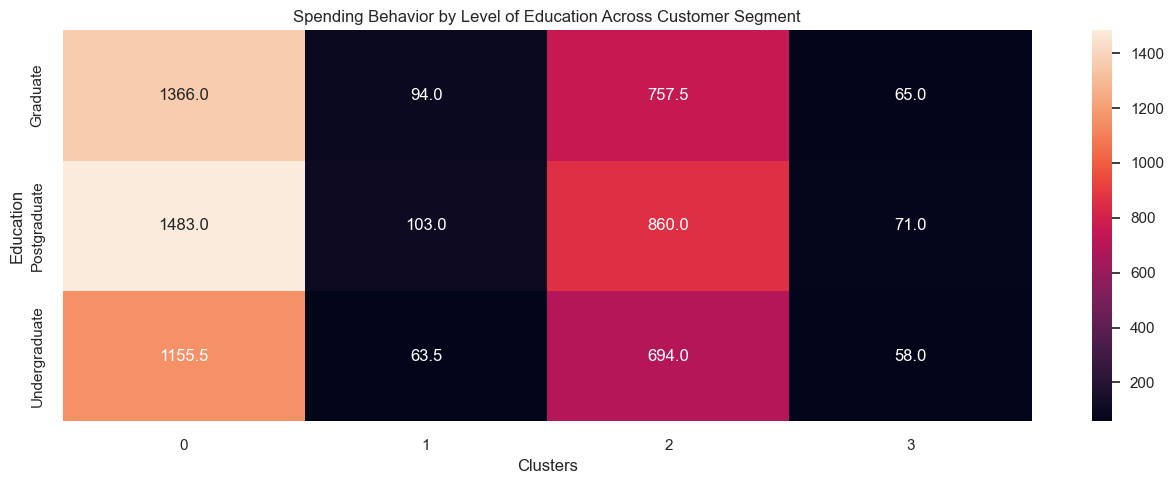

In [68]:
plt.figure(figsize = (13,5))
sns.heatmap(heatmap_data, annot=True, fmt='.1f')
plt.xlabel('Clusters')
plt.title('Spending Behavior by Level of Education Across Customer Segment')
plt.tight_layout()
plt.show()

### Wine

Cluster 0 and Cluster 2 are your top wine buyers.

Cluster 1 and Cluster 3 are likely not interested in wine

In [69]:
df6.groupby('clusters')['Wine'].median().round(2)

clusters
0    563.0
1     51.0
2    479.0
3     14.0
Name: Wine, dtype: float64

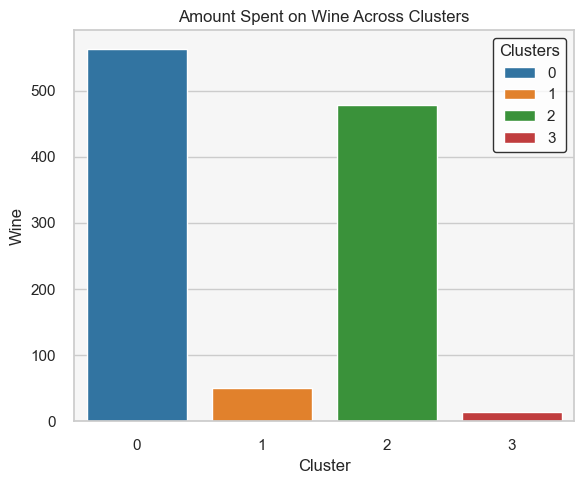

In [70]:
plt.figure(figsize = (6, 5))
sns.barplot(x='clusters', y='Wine', data=df6, palette='tab10',estimator = 'median', hue = 'clusters', errorbar=None)
plt.legend(title = 'Clusters', edgecolor ='black', frameon =True)
plt.gca().set_facecolor('#f6f6f6')
plt.xlabel('Cluster')
plt.title('Amount Spent on Wine Across Clusters')
plt.tight_layout()
plt.show()

### Fruits

People in Cluster 0 are the main buyers of fruits.

The other clusters — especially Cluster 1 and Cluster 3 — hardly spend anything on fruits.

Cluster 2 spends a bit more, but still far behind Cluster 0.

In [71]:
df6.groupby('clusters')['Fruits'].median().round(2)

clusters
0    53.0
1     2.0
2    16.0
3     3.0
Name: Fruits, dtype: float64

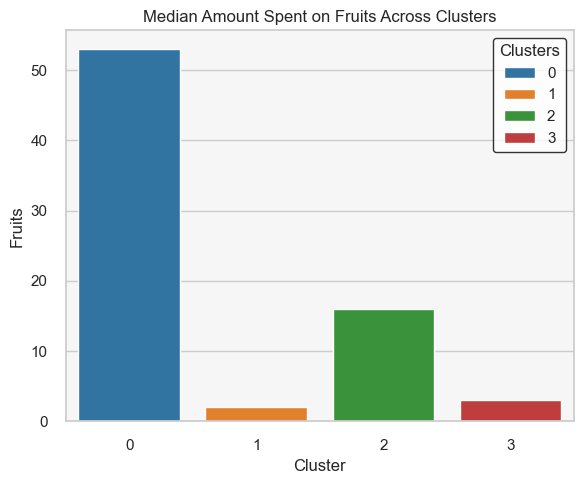

In [72]:
plt.figure(figsize = (6, 5))
sns.barplot(x='clusters', y='Fruits', data=df6, palette='tab10',estimator = 'median', hue = 'clusters', errorbar=None)
plt.legend(title = 'Clusters', edgecolor ='black', frameon =True)
plt.gca().set_facecolor('#f6f6f6')
plt.xlabel('Cluster')
plt.title('Median Amount Spent on Fruits Across Clusters')
plt.tight_layout()
plt.show()

### Meat
Cluster 0 customers are the top meat buyers — they spend the most.

Cluster 2 spends a moderate amount on meat.

Clusters 1 and 3 spend very little, possibly not very interested in meat or buy it rarely.

In [73]:
df6.groupby('clusters')['Meat'].median().round(2)

clusters
0    424.0
1     19.0
2    137.0
3     15.0
Name: Meat, dtype: float64

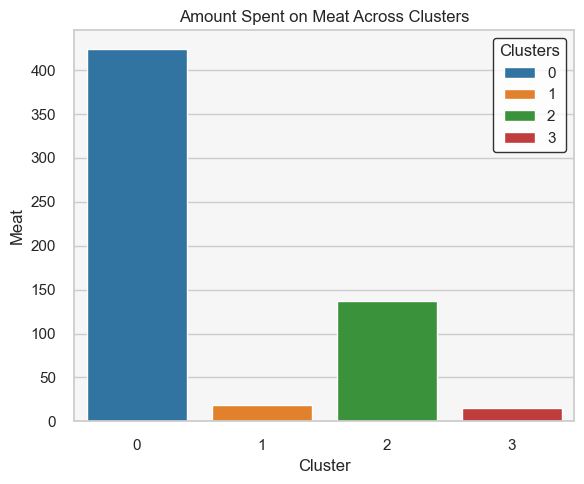

In [74]:
plt.figure(figsize = (6, 5))
sns.barplot(x='clusters', y='Meat', data=df6, palette='tab10',estimator = 'median', hue = 'clusters', errorbar=None)
plt.legend(title = 'Clusters', edgecolor ='black', frameon =True)
plt.gca().set_facecolor('#f6f6f6')
plt.xlabel('Cluster')
plt.title('Amount Spent on Meat Across Clusters')
plt.tight_layout()
plt.show()

### Fish
Cluster 0 stands out as the main group that spends on fish.

Clusters 1 and 3 barely spend on fish at all.

Cluster 2 spends a little, but still much less than Cluster 0.

In [75]:
df6.groupby('clusters')['Fish'].median().round(2)

clusters
0    90.0
1     3.0
2    21.0
3     4.0
Name: Fish, dtype: float64

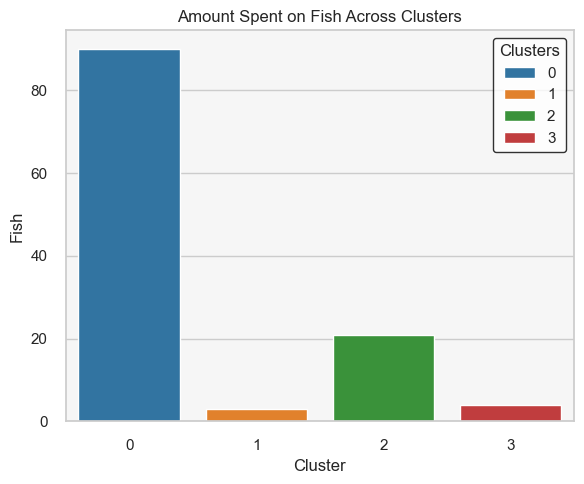

In [76]:
plt.figure(figsize = (6, 5))
sns.barplot(x='clusters', y='Fish', data=df6, palette='tab10',estimator = 'median', hue = 'clusters', errorbar=None)
plt.legend(title = 'Clusters', edgecolor ='black', frameon =True)
plt.gca().set_facecolor('#f6f6f6')
plt.xlabel('Cluster')
plt.title('Amount Spent on Fish Across Clusters')
plt.tight_layout()
plt.show()

### Sweets
Cluster 0 customers are clearly the biggest sweet lovers.

Cluster 2 shows some interest, but not much.

Clusters 1 and 3 spend very little

In [77]:
df6.groupby('clusters')['Sweets'].median().round(2)

clusters
0    57.0
1     2.0
2    17.0
3     3.0
Name: Sweets, dtype: float64

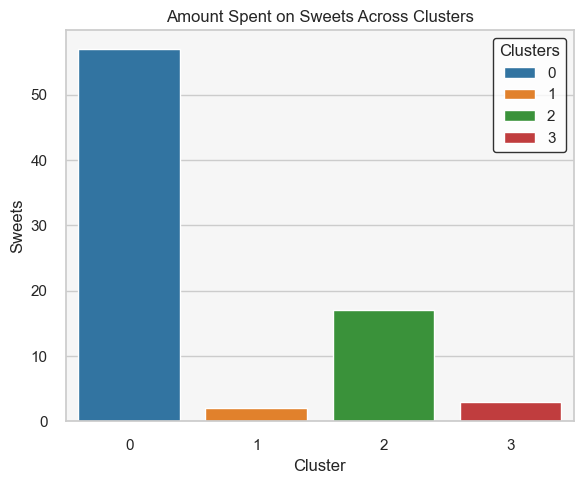

In [78]:
plt.figure(figsize = (6, 5))
sns.barplot(x='clusters', y='Sweets', data=df6, palette='tab10',estimator = 'median', hue = 'clusters', errorbar=None)
plt.legend(title = 'Clusters', edgecolor ='black', frameon =True)
plt.gca().set_facecolor('#f6f6f6')
plt.xlabel('Cluster')
plt.title('Amount Spent on Sweets Across Clusters')
plt.tight_layout()
plt.show()

### Gold

Clusters 0 and 2 are your primary gold product buyers.

Clusters 1 and 3 spend very little 

In [79]:
df6.groupby('clusters')['Gold'].median().round(2)

clusters
0    55.0
1    10.0
2    51.5
3    11.0
Name: Gold, dtype: float64

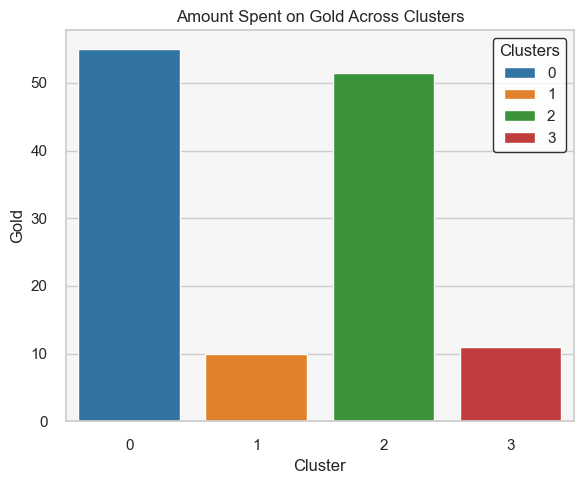

In [80]:
plt.figure(figsize = (6, 5))
sns.barplot(x='clusters', y='Gold', data=df6, palette='tab10',estimator = 'median', hue = 'clusters', errorbar=None)
plt.legend(title = 'Clusters', edgecolor ='black', frameon =True)
plt.gca().set_facecolor('#f6f6f6')
plt.xlabel('Cluster')
plt.title('Amount Spent on Gold Across Clusters')
plt.tight_layout()
plt.show()

### NumDealsPurchases
Cluster 2 are the most deal-oriented shoppers.

Cluster 1 is moderately engaged with discounts.

Clusters 0 and 3 show minimal interest in deals.

In [96]:
df6.groupby('clusters')['NumDealsPurchases'].describe()

count      mean       std  min  25%  50%  75%   max
clusters                                                     
0         539.0  1.122449  0.618666  0.0  1.0  1.0  1.0   5.0
1         503.0  2.759443  1.699480  1.0  1.0  2.0  4.0  15.0
2         526.0  3.821293  2.388545  0.0  2.0  3.0  5.0  15.0
3         637.0  1.740973  1.202893  0.0  1.0  1.0  2.0  15.0

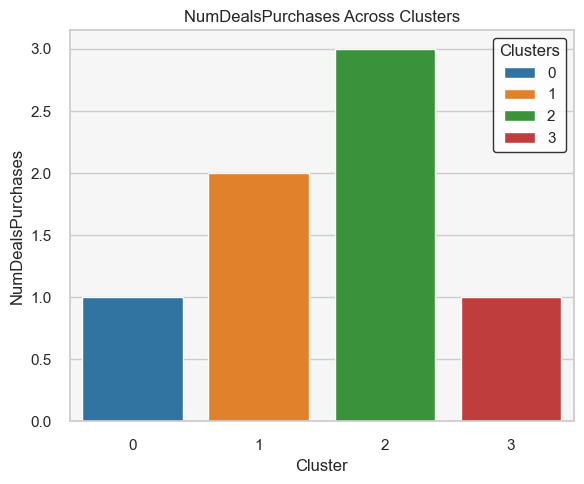

In [81]:
plt.figure(figsize = (6, 5))
sns.barplot(x='clusters', y='NumDealsPurchases', data=df6, palette='tab10',estimator = 'median', hue = 'clusters', errorbar=None)
plt.legend(title = 'Clusters', edgecolor ='black', frameon =True)
plt.gca().set_facecolor('#f6f6f6')
plt.xlabel('Cluster')
plt.title('NumDealsPurchases Across Clusters')
plt.tight_layout()
plt.show()

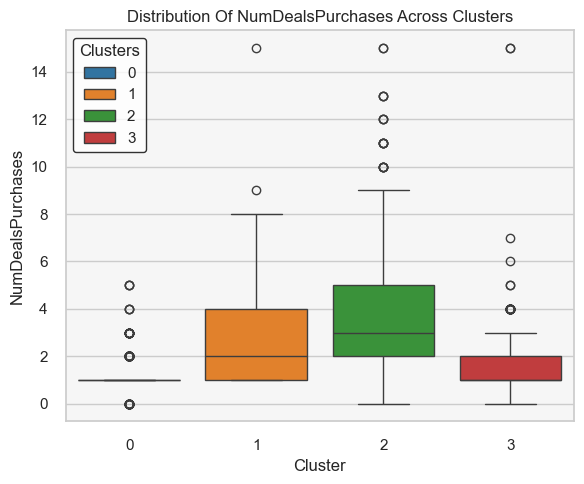

In [92]:
plt.figure(figsize = (6, 5))
sns.boxplot(x='clusters', y='NumDealsPurchases', data=df6, palette='tab10', hue ='clusters')
plt.xlabel('Clusters')
plt.legend(title = 'Clusters', edgecolor ='black', frameon =True, loc='upper left')
plt.gca().set_facecolor('#f6f6f6')
plt.xlabel('Cluster')
plt.title('Distribution Of NumDealsPurchases Across Clusters')
plt.tight_layout()
plt.show()


### NumWebPurchases

Cluster 2 are the most active online shoppers.

Cluster 0 are moderately active.

Clusters 1 and 3 show low online purchasing behavior.

In [105]:
df6.groupby('clusters')['NumWebPurchases'].describe()

count      mean       std  min  25%  50%  75%   max
clusters                                                     
0         539.0  5.096475  2.258805  1.0  4.0  5.0  6.0  27.0
1         503.0  2.687873  1.729747  0.0  1.0  2.0  4.0   9.0
2         526.0  6.743346  2.563610  0.0  5.0  7.0  8.0  25.0
3         637.0  2.191523  1.421220  0.0  1.0  2.0  3.0   9.0

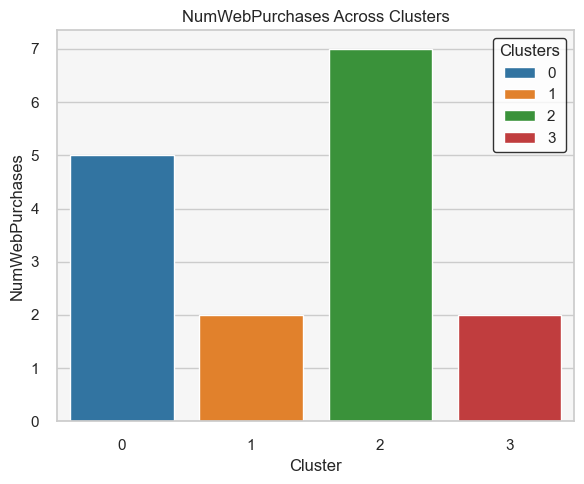

In [106]:
plt.figure(figsize = (6, 5))
sns.barplot(x='clusters', y='NumWebPurchases', data=df6, palette='tab10',estimator = 'median', hue = 'clusters', errorbar=None)
plt.legend(title = 'Clusters', edgecolor ='black', frameon =True)
plt.gca().set_facecolor('#f6f6f6')
plt.xlabel('Cluster')
plt.title('NumWebPurchases Across Clusters')
plt.tight_layout()
plt.show()

### NumCatalogPurchases

🟢 Cluster 0 – High Catalog Shoppers
These users make catalog purchases frequently, with a typical value of 6 purchases. They're the most engaged with catalog-based shopping.

🟡 Cluster 2 – Moderately Active Catalog Shoppers
With a median of 3 purchases, this group shows decent engagement, using the catalog channel occasionally.

🟠 Cluster 1 – Low Catalog Shoppers
Most users in this group make only 1 catalog purchase. They have a mild interest in shopping via catalog.

⚫ Cluster 3 – Inactive or Non-Catalog Shoppers
The typical number of catalog purchases here is 0, meaning users in this group rarely or never use catalogs to shop.

In [108]:
df6.groupby('clusters')['NumCatalogPurchases'].describe()

count      mean       std  min  25%  50%  75%   max
clusters                                                     
0         539.0  5.899814  2.355327  0.0  4.0  6.0  7.0  11.0
1         503.0  0.840954  0.920415  0.0  0.0  1.0  1.0   6.0
2         526.0  3.570342  2.332747  0.0  2.0  3.0  5.0  28.0
3         637.0  0.552590  0.802402  0.0  0.0  0.0  1.0   5.0

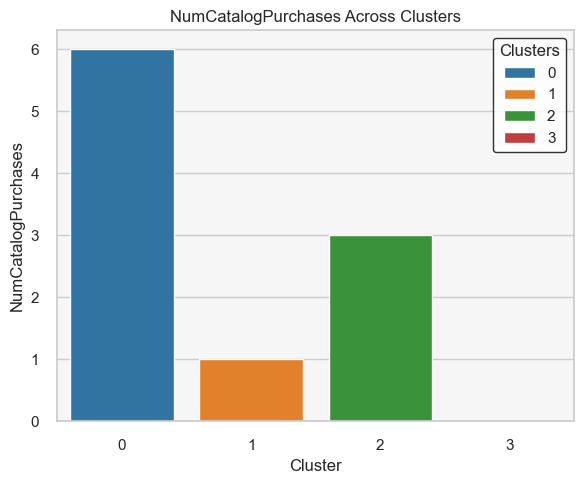

In [107]:
plt.figure(figsize = (6, 5))
sns.barplot(x='clusters', y='NumCatalogPurchases', data=df6, palette='tab10',estimator = 'median', hue = 'clusters', errorbar=None)
plt.legend(title = 'Clusters', edgecolor ='black', frameon =True)
plt.gca().set_facecolor('#f6f6f6')
plt.xlabel('Cluster')
plt.title('NumCatalogPurchases Across Clusters')
plt.tight_layout()
plt.show()

### NumStorePurchases
Clusters 0 & 2 are your most valuable in-store customers.

Clusters 1 & 3 are less engaged and may be better reached through other channels or targeted with store-specific promotions.

In [110]:
df6.groupby('clusters')['NumStorePurchases'].describe()

count      mean       std  min  25%  50%   75%   max
clusters                                                      
0         539.0  8.467532  2.848133  0.0  6.0  8.0  11.0  13.0
1         503.0  3.876740  1.548909  0.0  3.0  4.0   5.0  10.0
2         526.0  8.129278  2.731547  0.0  6.0  8.0  10.0  13.0
3         637.0  3.219780  1.181108  0.0  3.0  3.0   4.0   9.0

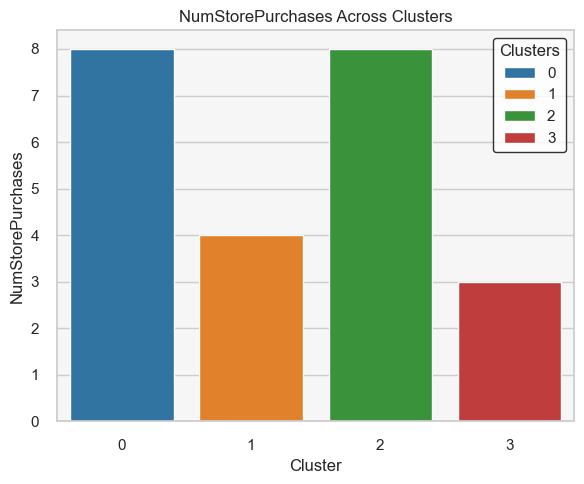

In [111]:
plt.figure(figsize = (6, 5))
sns.barplot(x='clusters', y='NumStorePurchases', data=df6, palette='tab10',estimator = 'median', hue = 'clusters', errorbar=None)
plt.legend(title = 'Clusters', edgecolor ='black', frameon =True)
plt.gca().set_facecolor('#f6f6f6')
plt.xlabel('Cluster')
plt.title('NumStorePurchases Across Clusters')
plt.tight_layout()
plt.show()

In [126]:
df6.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Wine',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Nos_Of_Children',
       'Loyalty_Duration', 'Age', 'Total_Spent', 'Is_parent', 'Family_size',
       'PC1', 'PC2', 'PC3', 'clusters'],
      dtype='object')